In [1882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

# Data Cleaning-

In [1883]:
household = pd.read_csv('hh_demographic.csv')

household.info()
household

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [1884]:
household.describe(include="all")

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
count,801,801,801,801,801,801,801,801.000000
unique,6,3,12,5,6,5,4,NaN
top,45-54,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,NaN
freq,288,344,192,504,255,318,558,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1235.176030
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736.804647
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1218.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914.000000


In [1885]:
household["MARITAL_STATUS_CODE"]=household["MARITAL_STATUS_CODE"].astype('category')
household["HOMEOWNER_DESC"]=household["HOMEOWNER_DESC"].astype('category')
household["household_key"]=household["household_key"].astype('int16')
household.columns.str.strip()
household.replace(r'^\s*$', np.nan, regex=True,inplace=True)

household.info()
household

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AGE_DESC             801 non-null    object  
 1   MARITAL_STATUS_CODE  801 non-null    category
 2   INCOME_DESC          801 non-null    object  
 3   HOMEOWNER_DESC       801 non-null    category
 4   HH_COMP_DESC         801 non-null    object  
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object  
 6   KID_CATEGORY_DESC    801 non-null    object  
 7   household_key        801 non-null    int16   
dtypes: category(2), int16(1), object(5)
memory usage: 34.9+ KB


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [1886]:
transactions = pd.read_csv('project_transactions.csv')

transactions.info(verbose=True,show_counts=True)
transactions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int64  
 3   PRODUCT_ID         2146311 non-null  int64  
 4   QUANTITY           2146311 non-null  int64  
 5   SALES_VALUE        2146311 non-null  float64
 6   STORE_ID           2146311 non-null  int64  
 7   RETAIL_DISC        2146311 non-null  float64
 8   WEEK_NO            2146311 non-null  int64  
 9   COUPON_DISC        2146311 non-null  float64
 10  COUPON_MATCH_DISC  2146311 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0


In [1887]:
transactions.describe(include="all")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06
mean,1.056232e+03,3.404897e+10,3.895059e+02,2.884715e+06,1.009703e+02,3.105908e+00,3.267939e+03,-5.333568e-01,5.632742e+01,-1.579855e-02,-2.805633e-03
std,6.050059e+02,4.723748e+09,1.900530e+02,3.831949e+06,1.152364e+03,4.186300e+00,9.122392e+03,1.229413e+00,2.715024e+01,2.121266e-01,3.924693e-02
min,1.000000e+00,2.698490e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.300200e+02,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,5.480000e+02,3.040798e+10,2.290000e+02,9.172310e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.800000e-01,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.042000e+03,3.281176e+10,3.920000e+02,1.027960e+06,1.000000e+00,2.000000e+00,3.720000e+02,0.000000e+00,5.700000e+01,0.000000e+00,0.000000e+00
75%,1.581000e+03,4.012804e+10,5.550000e+02,1.132771e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,2.099000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,1.020000e+02,0.000000e+00,0.000000e+00


In [1888]:
transactions["household_key"]=transactions["household_key"].astype('int16')
transactions["SALES_VALUE"]=transactions["SALES_VALUE"].astype('float32')
transactions["PRODUCT_ID"]=transactions["PRODUCT_ID"].astype('int32')
transactions["STORE_ID"]=transactions["STORE_ID"].astype('int32')
transactions["RETAIL_DISC"]=transactions["RETAIL_DISC"].astype('float32')
transactions["WEEK_NO"]=transactions["WEEK_NO"].astype('int8')
transactions["COUPON_DISC"]=transactions["COUPON_DISC"].astype('float32')
transactions["COUPON_MATCH_DISC"]=transactions["COUPON_MATCH_DISC"].astype('float32')
transactions["DAY"]=transactions["DAY"].astype("int16")
transactions.columns.str.strip()
transactions.replace(r'^\s*$', np.nan, regex=True,inplace=True)

transactions.info(verbose=True,show_counts=True)
transactions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int16  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int16  
 3   PRODUCT_ID         2146311 non-null  int32  
 4   QUANTITY           2146311 non-null  int64  
 5   SALES_VALUE        2146311 non-null  float32
 6   STORE_ID           2146311 non-null  int32  
 7   RETAIL_DISC        2146311 non-null  float32
 8   WEEK_NO            2146311 non-null  int8   
 9   COUPON_DISC        2146311 non-null  float32
 10  COUPON_MATCH_DISC  2146311 non-null  float32
dtypes: float32(4), int16(2), int32(2), int64(2), int8(1)
memory usage: 92.1 MB


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0


In [1889]:
products = pd.read_csv('product.csv')

products.info()
products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [1890]:
products.describe(include="all")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
count,9.235300e+04,92353.00000,92353,92353,92353,92353,92353
unique,NaN,NaN,44,2,308,2383,4345
top,NaN,NaN,GROCERY,National,GREETING CARDS/WRAP/PARTY SPLY,CARDS EVERYDAY,
freq,NaN,NaN,39021,78537,2785,1005,30607
mean,5.328353e+06,1739.22833,NaN,NaN,NaN,NaN,NaN
std,5.359937e+06,1818.26957,NaN,NaN,NaN,NaN,NaN
min,2.567100e+04,1.00000,NaN,NaN,NaN,NaN,NaN
25%,9.706280e+05,328.00000,NaN,NaN,NaN,NaN,NaN
50%,1.621091e+06,1094.00000,NaN,NaN,NaN,NaN,NaN
75%,9.704770e+06,2264.00000,NaN,NaN,NaN,NaN,NaN


In [1891]:
products["PRODUCT_ID"]=products["PRODUCT_ID"].astype("int32")
products["MANUFACTURER"]=products["MANUFACTURER"].astype("int16")
products["DEPARTMENT"]=products["DEPARTMENT"].astype("category")
products["BRAND"]=products["BRAND"].astype("category")
products["COMMODITY_DESC"]=products["COMMODITY_DESC"].astype("category")
products["SUB_COMMODITY_DESC"]=products["SUB_COMMODITY_DESC"].astype("category")
products.columns.str.strip()
products.replace(r'^\s*$', np.nan, regex=True,inplace=True)

products.info()
products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PRODUCT_ID            92353 non-null  int32   
 1   MANUFACTURER          92353 non-null  int16   
 2   DEPARTMENT            92338 non-null  category
 3   BRAND                 92353 non-null  category
 4   COMMODITY_DESC        92338 non-null  category
 5   SUB_COMMODITY_DESC    92338 non-null  category
 6   CURR_SIZE_OF_PRODUCT  61746 non-null  object  
dtypes: category(4), int16(1), int32(1), object(1)
memory usage: 1.9+ MB


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,NaN
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,NaN
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,NaN
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,NaN
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,NaN
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,NaN


# Analysis-

Objective1: Calculate the total sales value of the Mega Mart. Also find the total discount value and the overall percentage discount given by the Mega Mart.

In [1892]:
transactions["SALES_VALUE"].sum().round(2)

np.float32(6666244.5)

In [1893]:
transactions["TOTAL_DISC"]=transactions["RETAIL_DISC"]+transactions["COUPON_DISC"]+transactions["COUPON_MATCH_DISC"]

-transactions["TOTAL_DISC"].sum().round(2)

np.float32(1184679.8)

In [1894]:
transactions["TOTAL_DISC"]=transactions["RETAIL_DISC"]+transactions["COUPON_DISC"]+transactions["COUPON_MATCH_DISC"]

-(transactions["TOTAL_DISC"].sum()*100/transactions["SALES_VALUE"].sum()).round(2)

np.float32(17.77)

Objective2: Calculate the total quantity sold. Find the maximum quantity sold in a single row, inspect the row as well. Does this row have a high discount percentage?

In [1895]:
transactions["QUANTITY"].sum()

np.int64(216713611)

In [1896]:
transactions["DISCOUNT_PCT"]=abs(transactions["TOTAL_DISC"]*100/transactions["SALES_VALUE"])
row_with_max_quantity = transactions.loc[transactions["QUANTITY"]==transactions["QUANTITY"].max()]
row_with_max_quantity.reset_index(drop=True,inplace=True)

row_with_max_quantity

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,DISCOUNT_PCT
0,630,34749153595,503,6534178,89638,250.0,384,-13.45,73,0.0,0.0,-13.45,5.38


In [1897]:
transactions_no_inf = transactions[~np.isinf(transactions["DISCOUNT_PCT"])]

if row_with_max_quantity.iloc[0]["DISCOUNT_PCT"]>transactions_no_inf["DISCOUNT_PCT"].mean():
    print(True)
else:
    print(False)

False


Objective3: Find the total sales value per basket and the total sales value per household. Plot the distribution of total sales value purchased at the household level.

In [1898]:
(transactions.groupby("BASKET_ID")[["SALES_VALUE"]].sum())["SALES_VALUE"].mean()

np.float32(28.61798)

In [1899]:
(transactions.groupby("household_key")[["SALES_VALUE"]].sum())["SALES_VALUE"].mean()

np.float32(3175.914)

Text(0.5, 1.0, 'Distribution of total sales value purchased at household level')

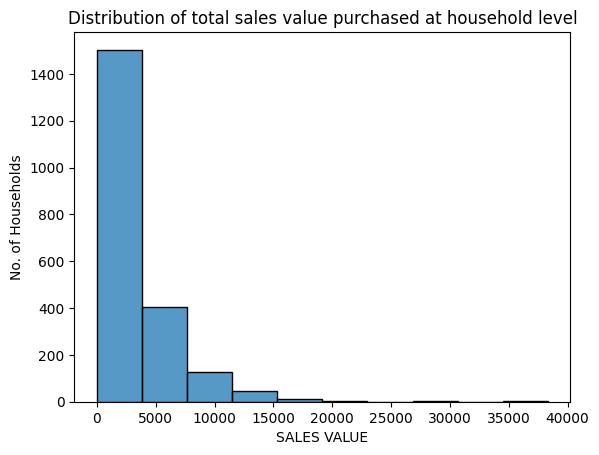

In [1900]:
totalsales_household = transactions.groupby("household_key")[["SALES_VALUE"]].sum().sort_values(by="SALES_VALUE", ascending=False).reset_index()

sns.histplot(x="SALES_VALUE",data=totalsales_household,bins=10)
plt.xlabel("SALES VALUE")
plt.ylabel("No. of Households")
plt.title("Distribution of total sales value purchased at household level")

Objective4: What are the top 10 households by quantity purchased and the top 10 households by sales value? Plot the total sales value for top 10 households by value, ordered from highest to lowest.

In [1901]:
transactions.groupby("household_key")[["QUANTITY"]].sum().sort_values(by="QUANTITY",ascending=False).reset_index().head(10)

,household_key,QUANTITY
0,1023,4479917
1,755,3141769
2,1609,2146715
3,13,1863829
4,1430,1741892
5,1527,1734632
6,1762,1669880
7,707,1640193
8,1029,1496204
9,1314,1492863


In [1902]:
top10_household_sales = transactions.groupby("household_key")[["SALES_VALUE"]].sum().sort_values(by="SALES_VALUE",ascending=False).reset_index().head(10)

top10_household_sales

,household_key,SALES_VALUE
0,1023,38319.789062
1,1609,27859.679688
2,1453,21661.289062
3,1430,20352.990234
4,718,19299.859375
5,707,19194.419922
6,1653,19153.750000
7,1111,18894.720703
8,982,18790.339844
9,400,18494.140625


Text(0.5, 1.0, 'Total sales value purchased at top10 households')

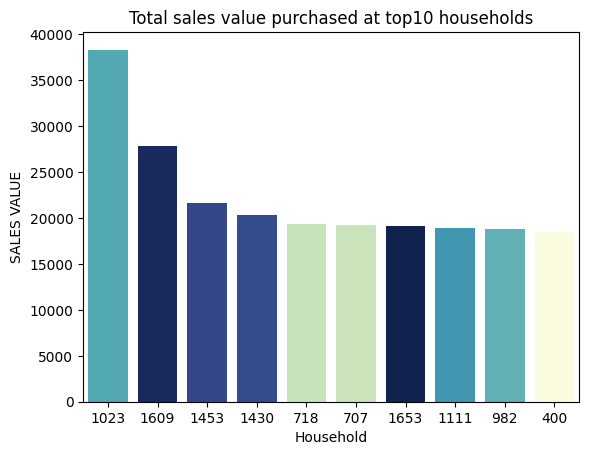

In [1903]:
sns.barplot(x="household_key", y="SALES_VALUE", data=top10_household_sales,hue="household_key",order=top10_household_sales["household_key"],palette="YlGnBu",legend=False)
plt.ylabel("SALES VALUE")
plt.xlabel("Household")
plt.title("Total sales value purchased at top10 households")

Objective5: Which products has the most sales by sales value? Plot a horizontal bar graph. Did the top 10 selling items have a higher than average discount rate?

In [1904]:
top10_product_sales = transactions.groupby("PRODUCT_ID")[["SALES_VALUE"]].sum().sort_values(by="SALES_VALUE",ascending=False).reset_index().head(10)

top10_product_sales

,PRODUCT_ID,SALES_VALUE
0,6534178,420154.125000
1,6533889,42339.308594
2,1029743,33894.750000
3,1082185,24149.789062
4,6533765,23831.140625
5,6534166,23755.699219
6,1106523,22931.009766
7,916122,22749.019531
8,995242,21229.720703
9,5569230,20051.949219


<Axes: xlabel='SALES_VALUE', ylabel='PRODUCT_ID'>

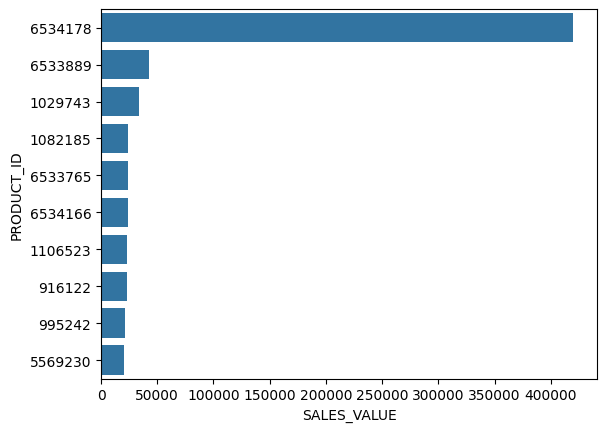

In [1905]:
sns.barplot(x="SALES_VALUE",y="PRODUCT_ID",data=top10_product_sales, order=top10_product_sales["PRODUCT_ID"],orient="h")

In [1906]:
top10_products = transactions_no_inf.loc[transactions["PRODUCT_ID"].isin(top10_product_sales["PRODUCT_ID"])]
top10_products_dis_pct = top10_products.groupby("PRODUCT_ID")[["DISCOUNT_PCT"]].mean().reset_index()
top10_products_dis_pct["AVERAGE"]=transactions_no_inf["DISCOUNT_PCT"].mean()
top10_products_dis_pct["HIGHER_THAN_AVERAGE"]=top10_products_dis_pct["DISCOUNT_PCT"].gt(transactions_no_inf["DISCOUNT_PCT"].mean())

top10_products_dis_pct

,PRODUCT_ID,DISCOUNT_PCT,AVERAGE,HIGHER_THAN_AVERAGE
0,916122,113.510887,22.016932,True
1,995242,54.508644,22.016932,True
2,1029743,7.652701,22.016932,False
3,1082185,10.807740,22.016932,False
4,1106523,7.327934,22.016932,False
5,5569230,52.985413,22.016932,True
6,6533765,0.000000,22.016932,False
7,6533889,3.324144,22.016932,False
8,6534166,3.331587,22.016932,False
9,6534178,3.289907,22.016932,False


Objective6: What was the most common product among those with the households in top 10 households by sales value?

In [1907]:
common_product_top10_households = transactions.loc[transactions["household_key"].isin(top10_household_sales["household_key"])]

common_product_top10_households.groupby("PRODUCT_ID").agg(sum_of_quantity=("QUANTITY","sum")).sort_values(by="sum_of_quantity",ascending=False).reset_index().head(10)

,PRODUCT_ID,sum_of_quantity
0,6533889,6432385
1,6534178,6228732
2,6534166,1492739
3,1426702,14073
4,1029743,671
5,1082185,658
6,951590,363
7,860776,360
8,1127831,345
9,1106523,343


Objective7: Lookup the product id that had the highest quantity sold in a single row.

In [1909]:
transactions.sort_values(by="QUANTITY",ascending=False).reset_index().head(10)

,index,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,DISCOUNT_PCT
0,1442095,630,34749153595,503,6534178,89638,250.000000,384,-13.45,73,0.0,0.0,-13.45,5.380000
1,399061,630,29484790880,185,6534178,61335,150.210007,384,-6.13,27,0.0,0.0,-6.13,4.080953
2,136912,149,28210551971,103,6534178,51912,110.000000,327,-5.19,15,0.0,0.0,-5.19,4.718182
3,1103781,193,32956767959,402,6534178,48073,121.099998,310,-7.21,58,0.0,0.0,-7.21,5.953757
4,1285846,149,33768630428,456,6534178,41833,115.000000,327,-4.18,66,0.0,0.0,-4.18,3.634782
5,312310,149,29035716247,158,6534178,41686,100.000000,327,-4.17,23,0.0,0.0,-4.17,4.170000
6,128203,1406,28167562655,99,6544236,41485,85.000000,327,-4.15,15,0.0,0.0,-4.15,4.882353
7,70907,107,27865225627,74,6534178,39365,72.000000,329,-3.94,11,0.0,0.0,-3.94,5.472222
8,622509,630,30822908062,256,6534178,38348,71.669998,384,-5.75,37,0.0,0.0,-5.75,8.022882
9,197378,630,28512218113,121,6534178,37391,73.250000,384,-3.74,18,0.0,0.0,-3.74,5.105802


Objective8: Plot the sum of sales by month. Are the sales growing over time? Now plot the same series after filtering down to dates between april,2016 and october,2017.

In [1910]:
transactions_by_month = transactions.loc[:,["DAY","SALES_VALUE"]]
transactions_by_month["DATE"]=pd.to_datetime("2016-01-01")+pd.to_timedelta(transactions_by_month["DAY"]-1,unit="D")

transactions_by_month.index = transactions_by_month["DATE"]
transactions_by_month.drop(columns=["DAY","DATE"],inplace=True)

transactions_by_month = transactions_by_month.resample("ME",level=0).sum().reset_index()
transactions_by_month["MONTH"] = transactions_by_month["DATE"].dt.month_name()

transactions_by_month

,DATE,SALES_VALUE,MONTH
0,2016-01-31,46557.968750,January
1,2016-02-29,97315.156250,February
2,2016-03-31,185521.812500,March
3,2016-04-30,267801.375000,April
4,2016-05-31,298319.125000,May
5,2016-06-30,288952.437500,June
6,2016-07-31,296488.031250,July
7,2016-08-31,303951.343750,August
8,2016-09-30,302040.562500,September
9,2016-10-31,309962.406250,October


(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01'),
  Text(17257.0, 0, '2017-04'),
  Text(17348.0, 0, '2017-07'),
  Text(17440.0, 0, '2017-10'),
  Text(17532.0, 0, '2018-01')])

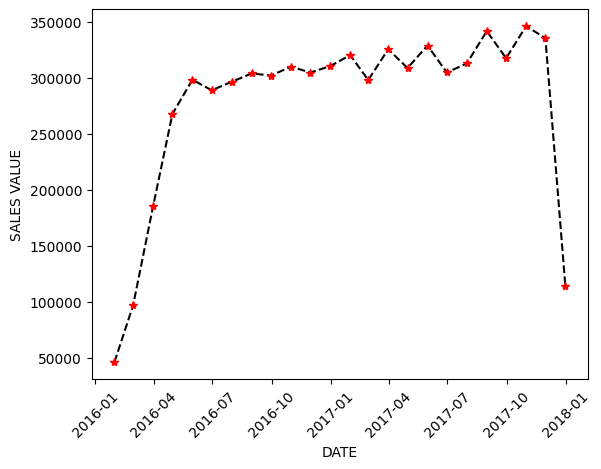

In [1911]:
plt.plot(transactions_by_month["DATE"],transactions_by_month["SALES_VALUE"],ls="--",c="k",marker="*",mec="r",mfc="r")
plt.xlabel("DATE")
plt.ylabel("SALES VALUE")
plt.xticks(rotation=45)

(array([16922., 16983., 17045., 17106., 17167., 17226., 17287., 17348.,
        17410., 17471.]),
 [Text(16922.0, 0, '2016-05'),
  Text(16983.0, 0, '2016-07'),
  Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09'),
  Text(17471.0, 0, '2017-11')])

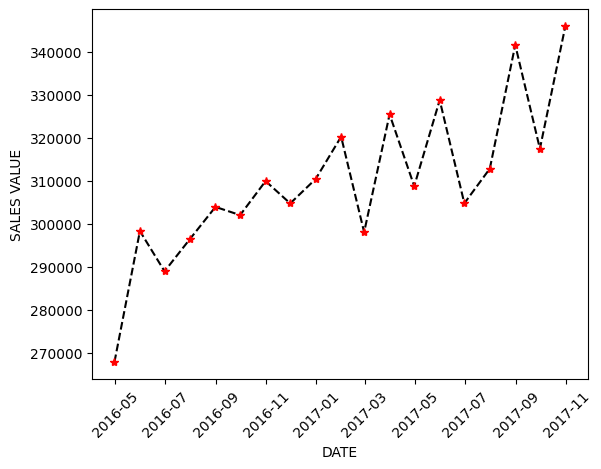

In [1912]:
plt.plot(transactions_by_month["DATE"][3:22],transactions_by_month["SALES_VALUE"][3:22],ls="--",c="k",marker="*",mec="r",mfc="r")
plt.xlabel("DATE")
plt.ylabel("SALES VALUE")
plt.xticks(rotation=45)

Objective9: Plot the sum of monthly sales in 2016 vs the monthly sales in 2017.

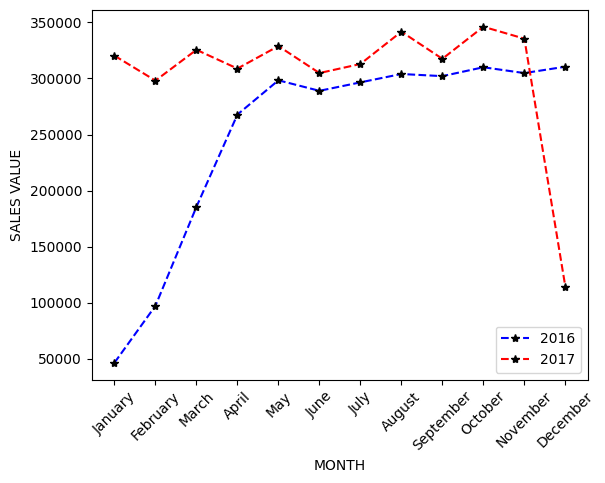

In [1913]:
plt.plot(transactions_by_month["MONTH"][:12],transactions_by_month["SALES_VALUE"][:12],"*--b",mfc="k",mec="k")
plt.plot(transactions_by_month["MONTH"][12:],transactions_by_month["SALES_VALUE"][12:],"*--r",mfc="k",mec="k")
plt.xlabel("MONTH")
plt.ylabel("SALES VALUE")
plt.xticks(rotation=45)
plt.legend(["2016","2017"])

Ojective10: Plot the total sales by days of week.

In [1914]:
transactions_by_dayofweek = transactions.loc[:,["DAY","SALES_VALUE"]]
transactions_by_dayofweek["DATE"] = pd.to_datetime("2016-01-01")+pd.to_timedelta(transactions_by_dayofweek["DAY"]-1,unit="D")

transactions_by_dayofweek = transactions_by_dayofweek.groupby("DATE")[["SALES_VALUE"]].sum().reset_index()
transactions_by_dayofweek["DAY_OF_WEEK"] = transactions_by_dayofweek["DATE"].dt.day_of_week

transactions_by_dayofweek = transactions_by_dayofweek.groupby("DAY_OF_WEEK")[["SALES_VALUE"]].sum().reset_index()
transactions_by_dayofweek["DAY_OF_WEEK"] = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

transactions_by_dayofweek

,DAY_OF_WEEK,SALES_VALUE
0,Monday,1.136462e+06
1,Tuesday,1.172458e+06
2,Wednesday,9.209571e+05
3,Thursday,8.398841e+05
4,Friday,8.329580e+05
5,Saturday,8.339447e+05
6,Sunday,9.295794e+05


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

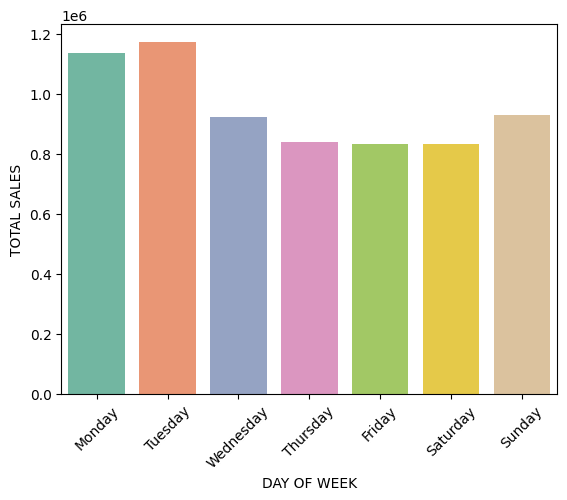

In [1915]:
sns.barplot(x=transactions_by_dayofweek["DAY_OF_WEEK"],y=transactions_by_dayofweek["SALES_VALUE"],data=transactions_by_dayofweek,hue="DAY_OF_WEEK",palette="Set2")
plt.xlabel("DAY OF WEEK")
plt.ylabel("TOTAL SALES")
plt.xticks(rotation=45)

Objective11: Plot the sum of sales by age and the sum of sale by income.

In [1916]:
household_by_age = household.loc[:,["AGE_DESC","household_key"]]
sales_by_hh_key = transactions.groupby("household_key")[["SALES_VALUE"]].sum().reset_index()

sales_by_age = household_by_age.merge(sales_by_hh_key,how="left",on="household_key")

sales_by_age = sales_by_age.groupby("AGE_DESC")[["SALES_VALUE"]].sum().reset_index()

sales_by_age

,AGE_DESC,SALES_VALUE
0,19-24,1.829910e+05
1,25-34,6.359556e+05
2,35-44,9.866702e+05
3,45-54,1.328371e+06
4,55-64,2.584462e+05
5,65+,2.604562e+05


<Axes: xlabel='SALES_VALUE', ylabel='AGE_DESC'>

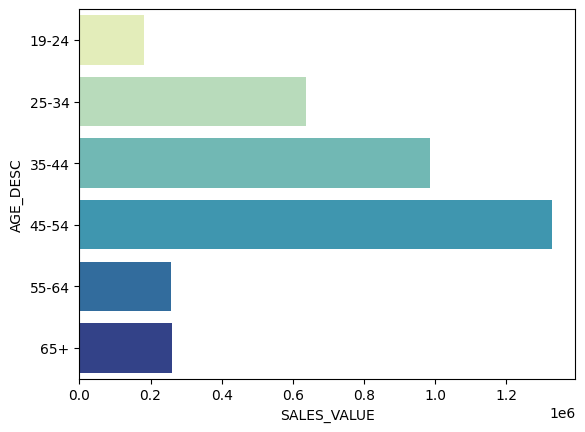

In [1917]:
sns.barplot(y=sales_by_age["AGE_DESC"],x=sales_by_age["SALES_VALUE"],data=sales_by_age,hue="AGE_DESC",palette="YlGnBu",orient="h")

In [1918]:
household_by_income = household.loc[:,["INCOME_DESC","household_key"]]
sales_by_hh_key = transactions.groupby("household_key")[["SALES_VALUE"]].sum().reset_index()

sales_by_income = household_by_income.merge(sales_by_hh_key,how="left",on="household_key")

sales_by_income = sales_by_income.groupby("INCOME_DESC")[["SALES_VALUE"]].sum().sort_values(by="SALES_VALUE",ascending=False).reset_index()
sales_by_income

,INCOME_DESC,SALES_VALUE
0,50-74K,878344.125000
1,35-49K,706011.187500
2,75-99K,467274.343750
3,25-34K,297183.406250
4,Under 15K,282448.500000
5,15-24K,274757.937500
6,125-149K,243900.828125
7,150-174K,199350.781250
8,100-124K,176701.109375
9,250K+,51715.160156


<Axes: xlabel='SALES_VALUE', ylabel='INCOME_DESC'>

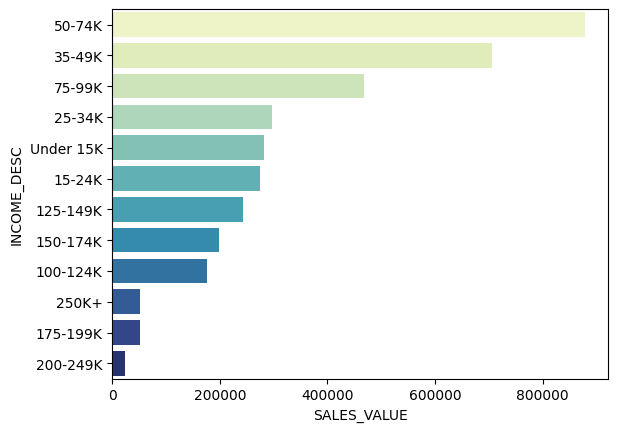

In [1919]:
sns.barplot(y=sales_by_income["INCOME_DESC"],x=sales_by_income["SALES_VALUE"],data=sales_by_income,hue="INCOME_DESC",palette="YlGnBu",orient="h")

Objective12: Calculate the mean household sales by age and household composition. Which of the demographics has the highest average sales?

In [1920]:
hh_by_age_hhcompo = household.loc[:,["AGE_DESC","HH_COMP_DESC","household_key"]]
hh_by_age_hhcompo = hh_by_age_hhcompo.merge(sales_by_hh_key,how="inner",on="household_key")

age_hhcompo_pivot = hh_by_age_hhcompo.pivot_table(values="SALES_VALUE",index="AGE_DESC",columns="HH_COMP_DESC",aggfunc="mean")

age_hhcompo_pivot

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796875,5428.945312,4020.800049,4576.095703,3216.834961,4911.274902
25-34,5512.196777,5753.973633,5638.515625,4807.440918,4909.522461,7356.270508
35-44,6297.737793,6691.772461,6260.412598,6015.192383,4844.191895,4227.691895
45-54,6632.568848,6610.484863,5839.526855,4549.365234,4636.637207,4843.995605
55-64,3064.869873,4695.654785,5752.413574,4816.148438,3922.546143,7973.750000
65+,4040.810059,5536.866699,4614.108398,4059.699463,3871.555908,2879.290039


Objective13: Calculate the sum of sales by age and department. Which category does the youngest demographic perform well in? Export the pivot table in an excel file.

In [1921]:
products_by_department = products.loc[:,["PRODUCT_ID","DEPARTMENT"]]
trans_by_hh_and_prod = transactions.loc[:,["PRODUCT_ID","household_key","SALES_VALUE"]]

trans_by_age_depart = trans_by_hh_and_prod.merge(household_by_age,how="inner",on="household_key").merge(products_by_department,how="inner",on="PRODUCT_ID")

trans_by_age_depart

,PRODUCT_ID,household_key,SALES_VALUE,AGE_DESC,DEPARTMENT
0,842930,1364,2.19,65+,GROCERY
1,897044,1364,2.99,65+,GROCERY
2,920955,1364,3.09,65+,MEAT
3,937406,1364,2.50,65+,MEAT-PCKGD
4,981760,1364,0.60,65+,GROCERY
...,...,...,...,...,...
1161570,844054,1369,1.29,25-34,GROCERY
1161571,844759,1369,1.69,25-34,GROCERY
1161572,959737,1369,25.98,25-34,GROCERY
1161573,1135096,1369,1.99,25-34,GROCERY


In [1922]:
age_depart_pivot = trans_by_age_depart.pivot_table(values="SALES_VALUE",index="AGE_DESC",columns="DEPARTMENT",aggfunc="sum",observed=False)
print(age_depart_pivot.to_string())

DEPARTMENT       AUTOMOTIVE  CHARITABLE CONT  CHEF SHOPPE  CNTRL/STORE SUP    COSMETICS  COUP/STR & MFG  DAIRY DELI          DELI  DELI/SNACK BAR        DRUG GM  ELECT &PLUMBING       FLORAL  FROZEN GROCERY  GARDEN CENTER  GM MERCH EXP  GRO BAKERY        GROCERY  HBC  HOUSEWARES     KIOSK-GAS          MEAT    MEAT-PCKGD  MEAT-WHSE  MISC SALES TRAN  MISC. TRANS.     NUTRITION        PASTRY  PHARMACY SUPPLY  PHOTO  PORK  POSTAL CENTER  PROD-WHS SALES       PRODUCE  RESTAURANT         RX    SALAD BAR      SEAFOOD  SEAFOOD-PCKGD      SPIRITS  TOYS  TRAVEL & LEISUR  VIDEO  VIDEO RENTAL
AGE_DESC                                                                                                                                                                                                                                                                                                                                                                                                                    

In [1924]:
age_depart_pivot.to_excel("/Users/shadowkiopness/Documents/exported_excel_sheet.xlsx",sheet_name="sheet1")